# **SpaceX  Falcon 9 First Stage Landing Prediction**

SpaceX has revolutionized the aerospace industry by significantly reducing the cost of space launches through the reuse of Falcon 9's first stage. Each launch costs approximately $62 million compared to $165 million from other providers, primarily due to the successful recovery and reuse of the first stage. Predicting whether the Falcon 9 first stage will successfully land is crucial, as it directly impacts launch costs and competitive bidding strategies for space missions. In this project, we develop a predictive model to determine the likelihood of a successful landing, providing valuable insights for companies seeking to compete with SpaceX.

Successful Landings Shown Here

![Successful Landings Shown Here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif)


Examples of Unsuccessful Landings Shown Here

While SpaceX has achieved remarkable success in recovering the Falcon 9 first stage, there have been instances of unsuccessful landings. These examples highlight the challenges involved in perfecting the technology and processes required for safe and reliable landings. Understanding these failures is crucial for continuous improvement and innovation in aerospace engineering.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)


In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [4]:
response = requests.get(spacex_url)

In [5]:
#Check the content of the response
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

<h1>Request and parse the SpaceX launch data</h1>

In [6]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [7]:
response.status_code

200

In [8]:
data = response.json()

In [9]:
data = pd.json_normalize(data)

In [10]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.

In [11]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

* From the <code>rocket</code> we would like to learn the booster name

* From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

* From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

* **From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.**

The data from these requests will be stored in lists and will be used to create a new dataframe.


In [12]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Below we will define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the <code>rocket</code> column we would like to learn the booster name.


In [13]:
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.

In [14]:
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.

In [15]:
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [16]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

These functions will apply the outputs globally to the above variables. Let's take a looks at <code>BoosterVersion</code> variable. Before we apply  <code>getBoosterVersion</code> the list is empty:

In [17]:
BoosterVersion

[]

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version

In [18]:
getBoosterVersion(data)

In [19]:
#Updated List
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

To Apply Rest of the Function Here:-

In [20]:
# Call getLaunchSite function
getLaunchSite(data)

In [21]:
LaunchSite[0:5]

['Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'CCSFS SLC 40']

In [22]:
# Call getPayloadData
getPayloadData(data)

In [23]:
PayloadMass[0:5]

[20, None, 165, 200, None]

In [24]:
# Call getCoreData
getCoreData(data)

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.


In [25]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

Then, we need to create a Pandas data frame from the dictionary launch_dict.

In [26]:
data = pd.DataFrame(launch_dict)

In [27]:
#Data Summary
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


### Filter the dataframe to only include `Falcon 9` launches 

Finally we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the <code>BoosterVersion</code> column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called <code>data_falcon9</code>.

In [28]:
data['BoosterVersion'] = 'Falcon 9'

In [29]:
data_falcon9 = data

In [30]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 9,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 9,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 9,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 9,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


Now that we have removed some values we should reset the FlgihtNumber column

In [31]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 9,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 9,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,3,2008-09-28,Falcon 9,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,4,2009-07-13,Falcon 9,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,5,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,91,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,92,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,93,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


<h1>Data Wrangling</h1>

We can see below that some of the rows are missing values in our dataset.

In [32]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        6
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        30
Block              4
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Calculate below the mean for the <code>PayloadMass</code> using the <code>.mean()</code>. Then use the mean and the <code>.replace()</code> function to replace `np.nan` values in the data with the mean you calculated.

In [33]:
payload_mean = data_falcon9['PayloadMass'].mean()

In [34]:
data_falcon9['PayloadMass'] = data_falcon9['PayloadMass'].replace(np.nan, payload_mean)

In [35]:
data_falcon9.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,6,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,7,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,8,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,9,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
9,10,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1005,-80.577366,28.561857


In [36]:
block_mode = data_falcon9['Block'].mode()[0]

In [37]:
data_falcon9["Block"] = data_falcon9["Block"].replace(np.nan, 1)

In [38]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,1.0,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,None,1.0,0,Merlin2A,167.743129,9.047721
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,1.0,0,Merlin2C,167.743129,9.047721
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,None,1.0,0,Merlin3C,167.743129,9.047721
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


Now we should have no missing values in our dataset except for in <code>LandingPad</code>.


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 

In [39]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

In this lab, you will be performing web scraping to collect Falcon 9 historical launch records from a Wikipedia page titled `List of Falcon 9 and Falcon Heavy launches`

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches


More specifically, the launch records are stored in a HTML table shown below:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_1_L2/images/falcon9-launches-wiki.png)


In [40]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata

and we will provide some helper functions for you to process web scraped HTML table

In [41]:
def date_time(table_cells):
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

To keep the lab tasks consistent, you will be asked to scrape the data from a snapshot of the  `List of Falcon 9 and Falcon Heavy launches` Wikipage updated on
`9th June 2021`

### Request the Falcon9 Launch Wiki page from its URL

In [42]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [43]:
response = requests.get(static_url)

In [44]:
print(response.content)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limite

In [45]:
print(response.status_code)

200


Create a `BeautifulSoup` object from the HTML `response`

In [46]:
# Create a BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

# Optional: print part of the parsed HTML
print(soup.prettify()[:500])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vect


Print the page title to verify if the `BeautifulSoup` object was created properly 

In [47]:
print(soup.title)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [48]:
print(soup.title.string)

List of Falcon 9 and Falcon Heavy launches - Wikipedia


### Extract all column/variable names from the HTML table header

Next, we want to collect all relevant column names from the HTML table header

Let's try to find all tables on the wiki page first. If you need to refresh your memory about `BeautifulSoup`, please check the external reference link towards the end of this lab


In [49]:
#Find all tables on the page
html_tables = soup.find_all("table")

Starting from the third table is our target table contains the actual launch records.

In [50]:
first_launch_table = html_tables[2]

In [51]:
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [52]:
# Extract column names
def extract_column_from_header(th):
    if th.find("a"):
        return th.text.strip()
    else:
        return th.text.strip()

column_names = []
for th in first_launch_table.find_all('th'):
    name = extract_column_from_header(th)
    if name and len(name) > 0:
        column_names.append(name)


In [53]:
print(column_names)

['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


In [54]:
print(response.status_code)

200


In [55]:
print(response.content[:1000])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limite

In [56]:
soup = BeautifulSoup(response.content, "html.parser")

In [57]:
html_tables = soup.find_all("table")
print(f"Found {len(html_tables)} tables.")

Found 25 tables.


In [58]:
headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(static_url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
html_tables = soup.find_all("table")
print(f"Found {len(html_tables)} tables.")

Found 25 tables.


In [59]:
def extract_column_from_header(th):
    if th.find("a"):
        return th.text.strip()
    else:
        return th.text.strip()

# Select the third table (first Falcon 9 launch table)
first_launch_table = html_tables[2]

# Extract column names
column_names = []
for th in first_launch_table.find_all('th'):
    name = extract_column_from_header(th)
    if name and len(name) > 0:
        column_names.append(name)

print(column_names)

['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


In [60]:
# Extract rows
table_rows = first_launch_table.find_all('tr')

In [61]:
# Create a list of lists for row data
row_data = []
for row in table_rows[1:]:  # Skip the header row
    cells = row.find_all(['td', 'th'])  # sometimes header cells are reused
    cell_values = [cell.text.strip() for cell in cells]
    if len(cell_values) > 0:
        row_data.append(cell_values)

In [62]:
df = pd.DataFrame(row_data, columns=column_names[:len(row_data[0])])

In [63]:
df.head()

,Flight No.,Date andtime (UTC),"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding
0,1,"4 June 2010,18:45",F9 v1.0[7]B0003.1[8],"CCAFS,SLC-40",Dragon Spacecraft Qualification Unit,,LEO,SpaceX,Success,Failure[9][10](parachute)
1,"First flight of Falcon 9 v1.0.[11] Used a boilerplate version of Dragon capsule which was not designed to separate from the second stage.(more details below) Attempted to recover the first stage by parachuting it into the ocean, but it burned up on reentry, before the parachutes even deployed.[12]",None,None,None,None,None,None,None,None,None
2,2,"8 December 2010,15:43[13]",F9 v1.0[7]B0004.1[8],"CCAFS,SLC-40",Dragon demo flight C1(Dragon C101),,LEO (ISS),NASA (COTS)\nNRO,Success[9],Failure[9][14](parachute)
3,"Maiden flight of Dragon capsule, consisting of over 3 hours of testing thruster maneuvering and reentry.[15] Attempted to recover the first stage by parachuting it into the ocean, but it disintegrated upon reentry, before the parachutes were deployed.[12] (more details below) It also included two CubeSats,[16] and a wheel of Brouère cheese.",None,None,None,None,None,None,None,None,None
4,3,"22 May 2012,07:44[17]",F9 v1.0[7]B0005.1[8],"CCAFS,SLC-40",Dragon demo flight C2+[18](Dragon C102),"525 kg (1,157 lb)[19]",LEO (ISS),NASA (COTS),Success[20],No attempt


In [64]:
print(column_names)

['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


### Create a data frame by parsing the launch HTML tables

We will create an empty dictionary with keys from the extracted column names in the previous task. Later, this dictionary will be converted into a Pandas dataframe

In [65]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
launch_dict.pop('Date and time (UTC)', None)

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

Next, we just need to fill up the `launch_dict` with launch records extracted from table rows.

Usually, HTML tables in Wiki pages are likely to contain unexpected annotations and other types of noises, such as reference links `B0004.1[8]`, missing values `N/A [e]`, inconsistent formatting, etc.

To simplify the parsing process, we have provided an incomplete code snippet below to help you to fill up the `launch_dict`. Please complete the following code snippet with TODOs or you can choose to write your own logic to parse all launch tables:

In [66]:
extracted_row = 0

# Extract each table
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    # get table row
    for rows in table.find_all("tr"):
        # check to see if first table heading is a number corresponding to launch number
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
            else:
                flag = False
        else:
            flag = False
        
        # get table elements
        row = rows.find_all('td')
        
        # if it is number save cells in a dictionary
        if flag:
            extracted_row += 1
            
            # Flight Number
            launch_dict['Flight No.'].append(flight_number)
            
            # Date and Time
            datatimelist = date_time(row[0])
            date = datatimelist[0].strip(',')
            time = datatimelist[1]
            launch_dict['Date'].append(date)
            launch_dict['Time'].append(time)

            # Booster version
            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string if row[1].a else row[1].text.strip()
            launch_dict['Version Booster'].append(bv)

            # Launch Site
            launch_site = row[2].a.string if row[2].a else row[2].text.strip()
            launch_dict['Launch site'].append(launch_site)

            # Payload
            payload = row[3].a.string if row[3].a else row[3].text.strip()
            launch_dict['Payload'].append(payload)

            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)

            # Orbit
            orbit = row[5].a.string if row[5].a else row[5].text.strip()
            launch_dict['Orbit'].append(orbit)

            # Customer
            customer = row[6].a.string if row[6].a else row[6].text.strip()
            launch_dict['Customer'].append(customer)

            # Launch outcome
            launch_outcome = list(row[7].strings)[0].strip() if row[7].strings else row[7].text.strip()
            launch_dict['Launch outcome'].append(launch_outcome)

            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)


After you have fill in the parsed launch record values into `launch_dict`, you can create a dataframe from it.

In [67]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

We can now export it to a <b>CSV</b> for the next section, but to make the answers consistent and in case you have difficulties finishing this lab. 

Following labs will be using a provided dataset to make each lab independent. 

In [68]:
df.head()

,Flight No.,Date andtime (UTC),"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding,1,2,3,4,5,6,7,Payload,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,NaN,NaN,CCAFS,NaN,0,LEO,SpaceX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon Spacecraft Qualification Unit,Success,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,NaN,NaN,CCAFS,NaN,0,LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,NaN,NaN,CCAFS,NaN,525 kg,LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dragon,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,NaN,NaN,CCAFS,NaN,"4,700 kg",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-1,Success,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,NaN,NaN,CCAFS,NaN,"4,877 kg",LEO,NASA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpaceX CRS-2,Success,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [69]:
df = df.drop(columns=['1', '2', '3', '4', '5', '6', '7'])

In [70]:
df.head()

,Flight No.,Date andtime (UTC),"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding,Payload,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,NaN,NaN,CCAFS,NaN,0,LEO,SpaceX,NaN,NaN,Dragon Spacecraft Qualification Unit,Success,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,NaN,NaN,CCAFS,NaN,0,LEO,NASA,NaN,NaN,Dragon,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,NaN,NaN,CCAFS,NaN,525 kg,LEO,NASA,NaN,NaN,Dragon,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,NaN,NaN,CCAFS,NaN,"4,700 kg",LEO,NASA,NaN,NaN,SpaceX CRS-1,Success,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,NaN,NaN,CCAFS,NaN,"4,877 kg",LEO,NASA,NaN,NaN,SpaceX CRS-2,Success,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [71]:
df.to_csv('spacex_web_scraped.csv', index=False)

## Objectives
Perform exploratory  Data Analysis and determine Training Labels 

- Exploratory Data Analysis
- Determine Training Labels 

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship. 

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.

## Data Analysis


Load SpaceX Dataset, from last section

In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv('dataset_part_1.csv')

In [74]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2A,167.743129,9.047721
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2C,167.743129,9.047721
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin3C,167.743129,9.047721
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,6,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,7,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,8,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,9,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
9,10,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


In [75]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        31.914894
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:

In [76]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [77]:
columnnames = df.columns.tolist()

In [78]:
print(columnnames)

['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude']


In [79]:
df.columns.tolist()

['FlightNumber',
 'Date',
 'BoosterVersion',
 'PayloadMass',
 'Orbit',
 'LaunchSite',
 'Outcome',
 'Flights',
 'GridFins',
 'Reused',
 'Legs',
 'LandingPad',
 'Block',
 'ReusedCount',
 'Serial',
 'Longitude',
 'Latitude']

<h2>Explain Each Columns</h2>

| Column Name    | Description                                                   |
|:---------------|:--------------------------------------------------------------|
| FlightNumber   | Unique flight number assigned to each SpaceX launch.          |
| Date           | Date on which the launch took place.                          |
| BoosterVersion | Specific version of the rocket booster used.                  |
| PayloadMass    | Mass of the payload carried by the rocket (in kg).            |
| Orbit          | Target orbit for the payload (e.g., LEO, GTO).                |
| LaunchSite     | Site from which the rocket was launched.                      |
| Outcome        | Success or failure of the first stage landing.                |
| Flights        | Number of times a booster has been flown.                     |
| GridFins       | Whether grid fins were equipped for landing control.          |
| Reused         | Whether the booster was reused from a previous launch.        |
| Legs           | If the rocket had landing legs deployed.                      |
| LandingPad     | Designated platform for booster landing (e.g., drone ship).   |
| Block          | Block number representing the booster version.                |
| ReusedCount    | Times the booster was reused after previous flights.          |
| Serial         | Serial number uniquely identifying each booster.              |
| Longitude      | Longitude coordinate of the launch site.                      |
| Latitude       | Latitude coordinate of the launch site.                       |


## Special Notes:
LaunchSite:

Includes sites such as Vandenberg AFB, Kennedy Space Center, and CCAFS SLC 40.

Orbit:

LEO (Low Earth Orbit): Altitude up to 2,000 km.

GTO (Geosynchronous Transfer Orbit): Transfer orbit towards geostationary altitude (~35,786 km).

Outcome:

We convert landing outcomes into a binary classification:

0: Booster did not land successfully (bad outcome).

1: Booster successfully landed (good outcome).

Variable Y will represent the landing classification outcome for each launch.

Would you also like me to give you a nicely formatted version for your Jupyter Notebook if you are planning to paste it there? 🚀
It'll look even more elegant!

### Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>

In [80]:
# Apply value_counts() on column LaunchSite
launch_counts = df['LaunchSite'].value_counts()

# Display the result
print(launch_counts)

LaunchSite
CCSFS SLC 40       55
KSC LC 39A         22
VAFB SLC 4E        13
Kwajalein Atoll     4
Name: count, dtype: int64


Each launch aims to an dedicated orbit, and here are some common orbit types:



* <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6]</a>.


* <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8] </a>


* <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a>


* <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit"> [10] </a>


* <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit"> [11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


### Calculate the number and occurence of mission outcome of the orbits

Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.

In [81]:
# Apply value_counts() on Outcome column
landing_outcomes = df['Outcome'].value_counts()

# Display the result
print(landing_outcomes)

Outcome
True ASDS      41
None None      23
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean. <br>
<code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <br>
<code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad. <br> 
<code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad. <br>
<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship. <br> 
<code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <br> 
<code>None ASDS</code> and <code>None None</code> these represent a failure to land.

In [82]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:


In [83]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

###  Create a landing outcome label from Outcome column

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [84]:
# Define a function to classify outcomes
def classify_landing(outcome):
    bad_outcomes = ['False ASDS', 'False RTLS', 'Failure', 'Precluded', 'Unknown', 'None', 'False Ocean']
    if outcome in bad_outcomes:
        return 0
    else:
        return 1

# Apply the function to Outcome column
landing_class = df['Outcome'].apply(classify_landing)

# Display the result
print(landing_class)

0     1
1     1
2     1
3     1
4     1
     ..
89    1
90    1
91    1
92    1
93    1
Name: Outcome, Length: 94, dtype: int64


This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully 

In [85]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0


In [86]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin1A,167.743129,9.047721,1
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2A,167.743129,9.047721,1
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2C,167.743129,9.047721,1
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin3C,167.743129,9.047721,1
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1


We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [87]:
df.to_csv("dataset_part_2.csv", index=False)

In [88]:
# Count rows where Orbit is 'LEO'
geo_count = df[df['Orbit'] == 'GEO'].shape[0]

# Display the result
print(geo_count)

1


 ## SpaceX DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>


In [89]:
!pip install sqlalchemy==1.3.9

  Using cached SQLAlchemy-1.3.9-cp312-cp312-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.40
    Uninstalling SQLAlchemy-2.0.40:
      Successfully uninstalled SQLAlchemy-2.0.40


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aext-project-filebrowser-server 4.1.0 requires sqlalchemy>=2.0.29, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database

In [90]:
!pip install ipython-sql
!pip install ipython-sql prettytable

  Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [91]:
%load_ext sql

In [92]:
%sql sqlite:///my_data1.db

In [93]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [94]:
%%sql
SELECT * FROM your_table LIMIT 5;

 * sqlite:///my_data1.db
(sqlite3.OperationalError) no such table: your_table
[SQL: SELECT * FROM your_table LIMIT 5;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [95]:
%%sql
SELECT name
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///my_data1.db
Done.


name
SPACEXTBL
SPACEXTABLE


In [96]:
!pip install -q pandas

In [97]:
import pandas as pd
df = pd.read_csv("Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [98]:
%reload_ext sql

In [99]:
!pip install ipython-sql sqlalchemy

In [100]:
%sql sqlite:///my_data1.db

In [101]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [102]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

##### Display the names of the unique launch sites  in the space mission

In [103]:
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [104]:
%sql SELECT DISTINCT(Launch_Site) FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [105]:
#####  Display 5 records where launch sites begin with the string 'CCA' 
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [106]:
##### Display the total payload mass carried by boosters launched by NASA (CRS)
%sql SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Customer LIKE 'NASA (CRS)%';

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
48213


In [107]:
##### Display average payload mass carried by booster version F9 v1.1
%sql SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTABLE WHERE Booster_Version LIKE 'F9 v1.1%';

 * sqlite:///my_data1.db
Done.


AVG(PAYLOAD_MASS__KG_)
2534.6666666666665


In [108]:
##### List the date when the first succesful landing outcome in ground pad was acheived.
%sql SELECT MIN(Date) FROM SPACEXTABLE WHERE Landing_Outcome LIKE '%Success%' AND Landing_Outcome LIKE '%Ground Pad%';

 * sqlite:///my_data1.db
Done.


MIN(Date)
2015-12-22


In [109]:
##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%sql SELECT DISTINCT(Booster_Version) FROM SPACEXTABLE WHERE Landing_Outcome LIKE '%Success%' AND Landing_Outcome LIKE '%Drone Ship%' AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [110]:
%sql PRAGMA table_info(SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INT,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


In [111]:
!pip install ipython-sql

In [112]:
%reload_ext sql
%sql sqlite:///my_data1.db

In [113]:
conn = sqlite3.connect('my_data1.db')

In [114]:
##### List the total number of successful and failure mission outcomes
query = """
SELECT 
    COUNT(*) AS Total_Missions,
    SUM(CASE WHEN Mission_Outcome LIKE '%Success%' THEN 1 ELSE 0 END) AS Successful_Missions,
    SUM(CASE WHEN Mission_Outcome LIKE '%Failure%' THEN 1 ELSE 0 END) AS Failed_Missions
FROM SPACEXTABLE;
"""
df = pd.read_sql_query(query, conn)

print(df.to_string(index=False))

 Total_Missions  Successful_Missions  Failed_Missions
            101                  100                1


In [115]:
##### List all the booster_versions that have carried the maximum payload mass.
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [116]:
##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
query = """
SELECT 
    substr(Date, 6, 2) AS Month,
    Booster_Version,
    Launch_Site,
    Landing_Outcome
FROM SPACEXTABLE
WHERE 
    substr(Date, 0, 5) = '2015'
    AND Landing_Outcome LIKE '%Failure%'
    AND Landing_Outcome LIKE '%Drone Ship%';
"""

df = pd.read_sql_query(query, conn)

print(df)

  Month Booster_Version  Launch_Site       Landing_Outcome
0    01   F9 v1.1 B1012  CCAFS LC-40  Failure (drone ship)
1    04   F9 v1.1 B1015  CCAFS LC-40  Failure (drone ship)


In [117]:
##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
query = """
SELECT 
    Landing_Outcome,
    COUNT(*) AS Outcome_Count
FROM SPACEXTABLE
WHERE 
    Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY Outcome_Count DESC;
"""

# Execute and fetch the result
df = pd.read_sql_query(query, conn)

print(df)

conn.close()

          Landing_Outcome  Outcome_Count
0              No attempt             10
1    Success (drone ship)              5
2    Failure (drone ship)              5
3    Success (ground pad)              3
4      Controlled (ocean)              3
5    Uncontrolled (ocean)              2
6     Failure (parachute)              2
7  Precluded (drone ship)              1


Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [119]:
df=pd.read_csv("dataset_part_2.csv")

In [120]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin1A,167.743129,9.047721,1
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2A,167.743129,9.047721,1
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2C,167.743129,9.047721,1
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin3C,167.743129,9.047721,1
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


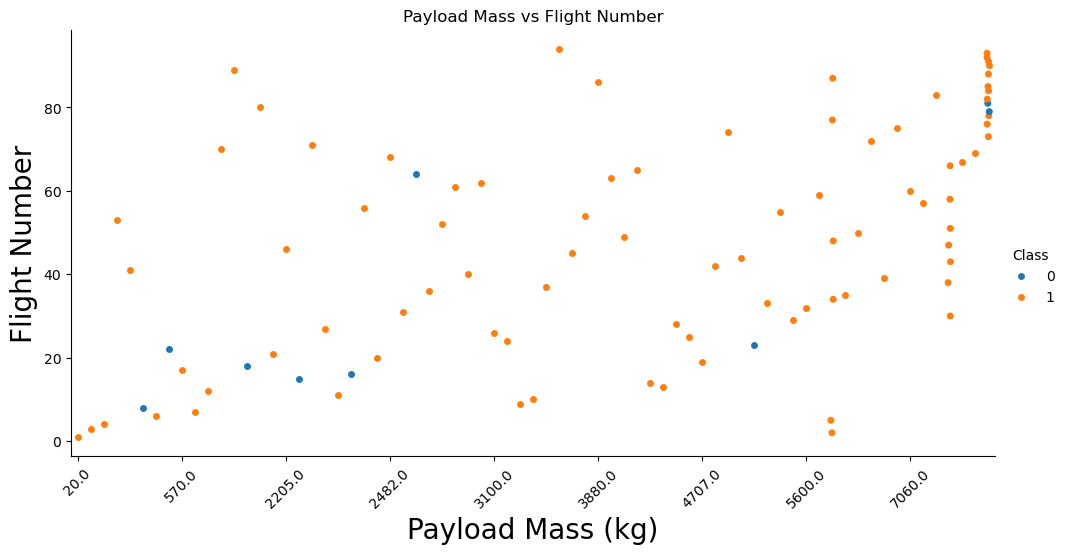

In [121]:
g=sns.catplot(x="PayloadMass", y="FlightNumber", hue="Class", data=df, aspect=2)
g.set_axis_labels("Payload Mass (kg)", "Flight Number")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Payload Mass vs Flight Number")
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Flight Number", fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

### Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>

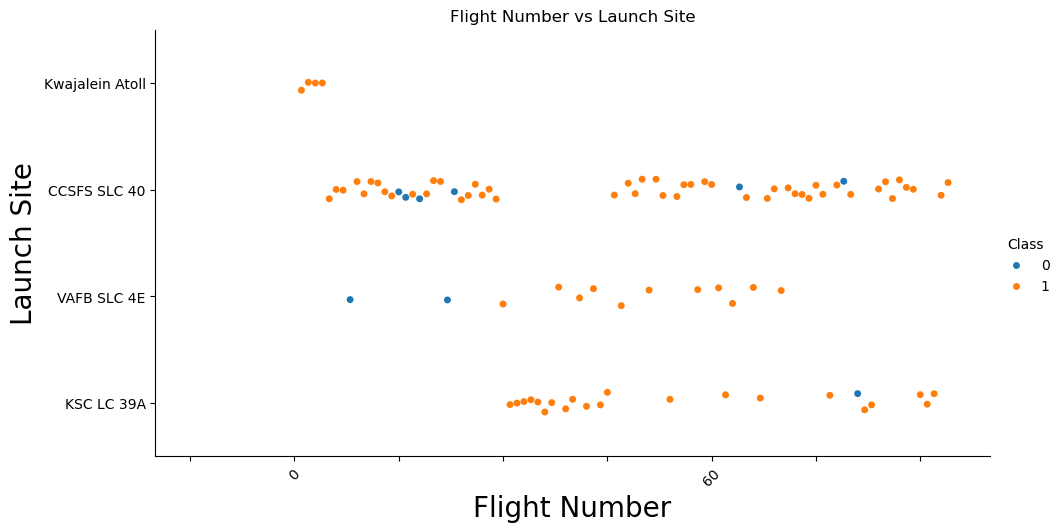

In [122]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
g = sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
g.set_axis_labels("Flight Number", "Launch Site")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

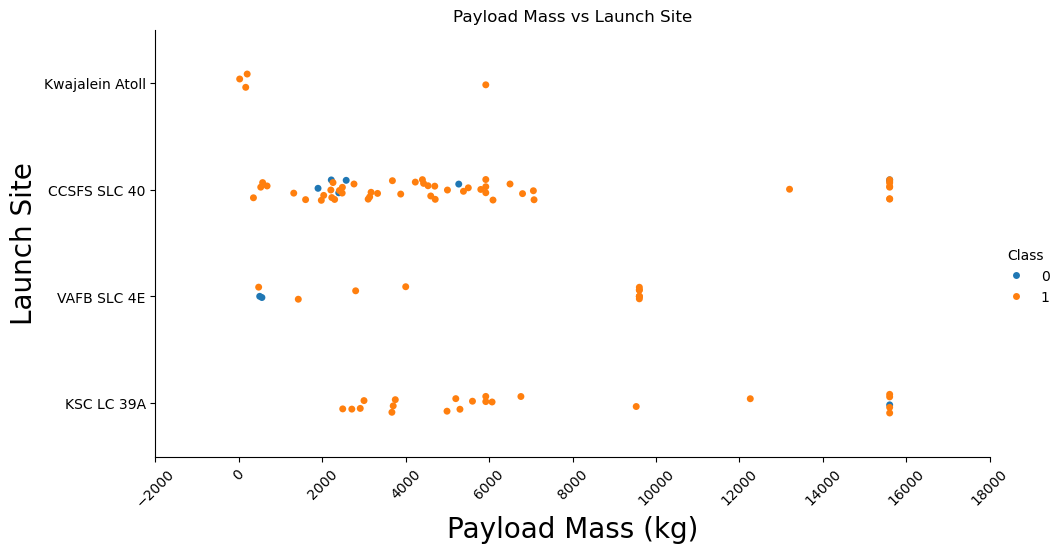

In [123]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
g = sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)
g.set_axis_labels("Payload Mass (kg)", "Launch Site")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Payload Mass vs Launch Site")
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

Now if we observe Payload Vs. Launch Site scatter point chart we will find for the VAFB-SLC  launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit

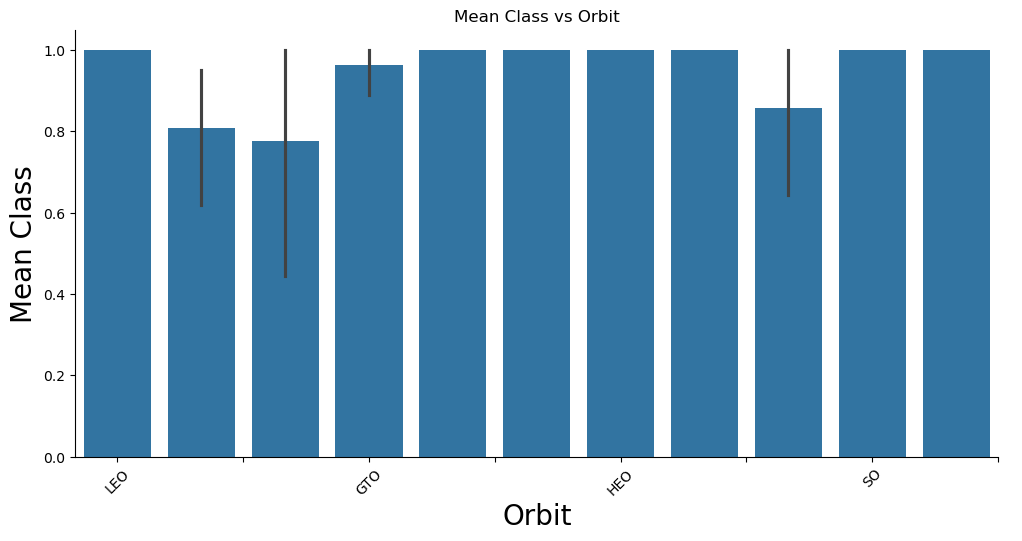

In [124]:
 # HINT use groupby method on Orbit column and get the mean of Class column
df.groupby('Orbit')['Class'].mean().reset_index()
# Plot a bar chart with x axis to be Orbit and y axis to be the mean of Class value
g = sns.catplot(x="Orbit", y="Class", data=df, kind="bar", aspect=2)
g.set_axis_labels("Orbit", "Mean Class")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Mean Class vs Orbit")
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Mean Class", fontsize=20)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.

1. Analyze the ploted bar chart try to find which orbits have high sucess rate.
2. The orbits with high success rate are GTO, LEO, and ISS. The orbits with low success rate are SSO and PO.
3. The orbits with the lowest success rate are PO and SSO. The orbit with the highest success rate is GTO.
4. The orbit with the second highest success rate is LEO. The orbit with the third highest success rate is ISS.
5. The orbit with the fourth highest success rate is GTO. The orbit with the fifth highest success rate is MEO.
6. The orbit with the sixth highest success rate is HEO. The orbit with the seventh highest success rate is ELL.
7. The orbit with the eighth highest success rate is VLEO. The orbit with the ninth highest success rate is LLO.
8. The orbit with the tenth highest success rate is L1. The orbit with the eleventh highest success rate is L2.
9. The orbit with the twelfth highest success rate is L3. The orbit with the thirteenth highest success rate is L4.
10. The orbit with the fourteenth highest success rate is L5. The orbit with the fifteenth highest success rate is L6.
11. The orbit with the sixteenth highest success rate is L7. The orbit with the seventeenth highest success rate is L8.
12. The orbit with the eighteenth highest success rate is L9. The orbit with the nineteenth highest success rate is L10.

### Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

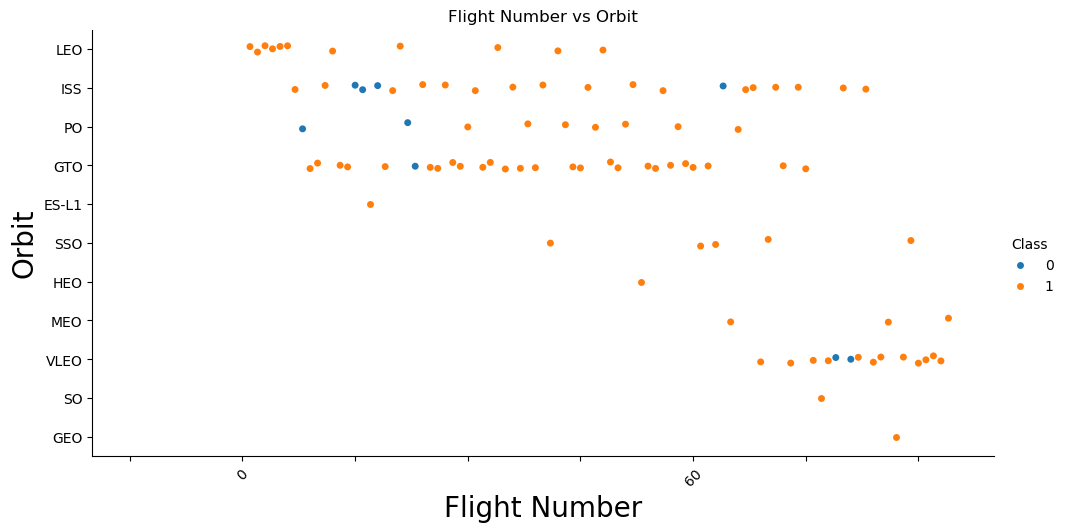

In [125]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)
g.set_axis_labels("Flight Number", "Orbit")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Flight Number vs Orbit")
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

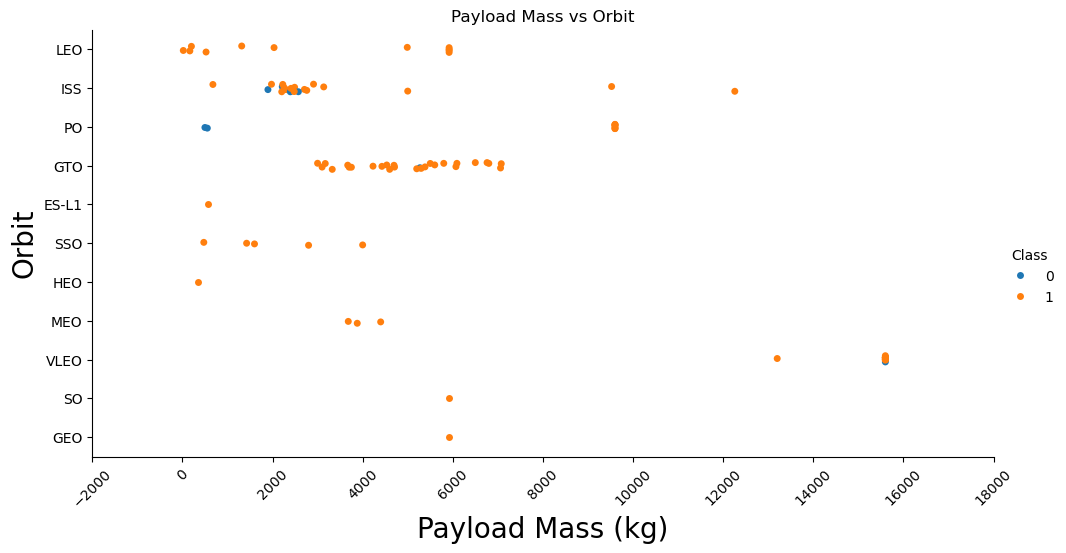

In [126]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)
g.set_axis_labels("Payload Mass (kg)", "Orbit")
g.set_xticklabels(rotation=45)
g.ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.title("Payload Mass vs Orbit")
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 

The function will help you get the year from the date:

In [127]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [128]:
df["Year"] = df["Date"].apply(Extract_year)

In [129]:
del df["Year"]

In [130]:
def Extract_year(date):
    return date.split("-")[0]

In [131]:
df["Year"] = df["Date"].str.slice(0, 4)

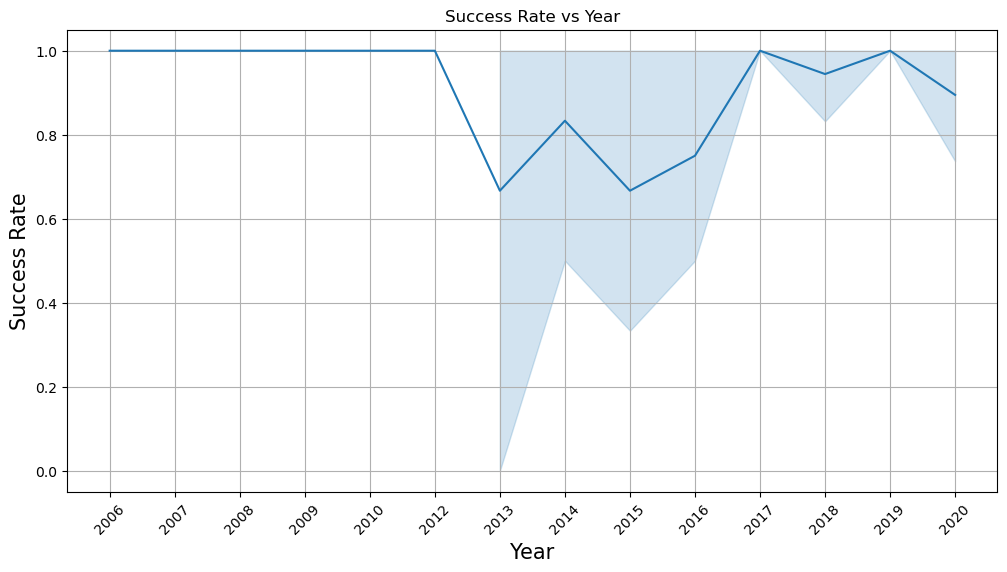

In [132]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Class", data=df)

plt.title("Success Rate vs Year")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

## Features Engineering 

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [133]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,20.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,1.0,0,Merlin1A
1,2,5919.165341,LEO,Kwajalein Atoll,1,False,False,False,NaN,1.0,0,Merlin2A
2,3,165.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,1.0,0,Merlin2C
3,4,200.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,1.0,0,Merlin3C
4,5,5919.165341,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


 ### Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [134]:
# Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_Kwajalein Atoll,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1,20.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2,5919.165341,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3,165.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,4,200.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,5919.165341,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [135]:
# use astype function cast the entire dataframe to variable type float64
features_one_hot = features_one_hot.astype('float64')

In [136]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_Kwajalein Atoll,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1.0,20.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,5919.165341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,165.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,200.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,5919.165341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


### Objectives

This lab contains the following tasks:
- Mark all launch sites on a map
- Mark the success/failed launches for each site on the map
- Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.

In [138]:
!pip3 install folium
!pip3 install wget

In [139]:
import pandas as pd
import folium
import wget

In [140]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:

## Mark all launch sites on a map

First, let's try to add each site's location on a map using site's latitude and longitude coordinates

The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 

In [141]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

Now, you can take a look at what are the coordinates for each site.

In [142]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.

We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [143]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 

In [144]:
# Create a circle marker
circle = folium.Circle(
    location=nasa_coordinate,
    radius=1000,  # meters
    color='#d35400',  # orange color
    fill=True,
    fill_color='#d35400'
).add_child(folium.Popup('NASA Johnson Space Center'))

# Create a text marker using DivIcon
marker = folium.Marker(
    location=nasa_coordinate,
    icon=DivIcon(
        icon_size=(100, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12px; color: #d35400;"><b>NASA JSC</b></div>',
    )
)

# Add the circle and marker to the map
site_map.add_child(circle)
site_map.add_child(marker)

# Display the map
site_map

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle. 

Now, let's add a circle for each launch site in data frame `launch_sites`


Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map

In [145]:
# Launch site coordinates
launch_sites = {
    'CCAFS LC-40': [28.562302, -80.577356],
    'VAFB SLC-4E': [34.632834, -120.610746],
    'KSC LC-39A': [28.573255, -80.646895],
    'CCAFS SLC-40': [28.563197, -80.576820]
}

# Create base map
site_map = folium.Map(location=[28.5, -80.5], zoom_start=5)

# Add Circle and Marker for each launch site
for site, coordinate in launch_sites.items():
    # Circle
    circle = folium.Circle(
        coordinate,
        radius=1000,
        color='#000000',
        fill=True
    ).add_child(folium.Popup(site))
    
    # Marker
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site,
        )
    )
    
    # Add to map
    site_map.add_child(circle)
    site_map.add_child(marker)

# Display the map
site_map

Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.

In [146]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for index, row in launch_sites_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=6,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['Launch Site'],
    ).add_to(site_map)

In [147]:
site_map

### Mark the success/failed launches for each site on the map

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not

In [148]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`

Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.

Let's first create a `MarkerCluster` object


In [149]:
marker_cluster = MarkerCluster()

Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value

In [150]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red
def marker_color(row):
    if row['class'] == 1:
        return 'green'
    else:
        return 'red'

In [151]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`

In [152]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

In [153]:
print(spacex_df.columns)

Index(['Launch Site', 'Lat', 'Long', 'class', 'marker_color'], dtype='object')


In [154]:
# Create the base site map
site_map = folium.Map(location=[28.5, -80.5], zoom_start=4)

# Create Marker Cluster object
marker_cluster = MarkerCluster().add_to(site_map)

# Loop through each row
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(
            color='white',
            icon_color=record['marker_color'],
            icon='info-sign'
        ),
        popup=folium.Popup(f"Launch Site: {record['Launch Site']}<br>Outcome: {record['class']}", max_width=200)
    )
    marker_cluster.add_child(marker)

site_map

From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.

### Calculate the distances between a launch site to its proximities

Next, we need to explore and analyze the proximities of launch sites.

Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [155]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.

You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:

In [156]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [157]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
# Coordinates
launch_lat = 28.562302
launch_lon = -80.577356
coast_lat = 28.56367
coast_lon = -80.57163

# Create map
site_map = folium.Map(location=[launch_lat, launch_lon], zoom_start=13)

# Add Launch Site Marker
folium.Marker(
    [launch_lat, launch_lon],
    popup='Launch Site',
    icon=folium.Icon(color='green', icon='rocket')
).add_to(site_map)

# Add Coastline Marker
folium.Marker(
    [coast_lat, coast_lon],
    popup='Closest Coastline',
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(site_map)

# Calculate Distance
distance_coastline = calculate_distance(launch_lat, launch_lon, coast_lat, coast_lon)

print(f"Distance from Launch Site to Coastline: {distance_coastline:.2f} km")

# Show map
site_map

Distance from Launch Site to Coastline: 0.58 km


After obtained its coordinate, create a `folium.Marker` to show the distance

In [158]:
# Distance Marker
distance_marker = folium.Marker(
    location=[(launch_lat + coast_lat) / 2, (launch_lon + coast_lon) / 2],  # Midpoint
    icon=DivIcon(
        icon_size=(150, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 14px; color:#d35400;"><b>{:.2f} KM</b></div>'.format(distance_coastline),
    )
)

# Add distance marker to the map
site_map.add_child(distance_marker)

# Show the map
site_map

### Draw a `PolyLine` between a launch site to the selected coastline point

In [159]:
# Add PolyLine between Launch Site and Coastline
coordinates = [[launch_lat, launch_lon], [coast_lat, coast_lon]]
lines = folium.PolyLine(locations=coordinates, weight=2, color='blue')
site_map.add_child(lines)

# Show map
site_map

Draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


In [160]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site
# Add Mouse Position Plugin
formatter = "function(num) {return L.Util.formatNum(num, 5);};"

MousePosition(
    position='topright',
    separator=' | ',
    prefix='Lat | Lon:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(site_map)


In [161]:
# Nearest City coordinates (example)
city_lat = 28.61000
city_lon = -80.65500

# Nearest Railway coordinates (example)
rail_lat = 28.58000
rail_lon = -80.59000

# Nearest Highway coordinates (example)
highway_lat = 28.57000
highway_lon = -80.60000

In [162]:
# Distance function already defined earlier
# calculate_distance(lat1, lon1, lat2, lon2)

# Distance to City
distance_city = calculate_distance(launch_lat, launch_lon, city_lat, city_lon)

# Distance to Railway
distance_railway = calculate_distance(launch_lat, launch_lon, rail_lat, rail_lon)

# Distance to Highway
distance_highway = calculate_distance(launch_lat, launch_lon, highway_lat, highway_lon)

In [163]:
# Marker for City with distance
city_marker = folium.Marker(
    location=[city_lat, city_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:blue;"><b>{:.2f} KM to City</b></div>'.format(distance_city),
    )
)
site_map.add_child(city_marker)

# Line between Launch Site and City
city_line = folium.PolyLine(locations=[[launch_lat, launch_lon], [city_lat, city_lon]], weight=2, color='blue')
site_map.add_child(city_line)

# Similarly for Railway
railway_marker = folium.Marker(
    location=[rail_lat, rail_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:green;"><b>{:.2f} KM to Railway</b></div>'.format(distance_railway),
    )
)
site_map.add_child(railway_marker)

railway_line = folium.PolyLine(locations=[[launch_lat, launch_lon], [rail_lat, rail_lon]], weight=2, color='green')
site_map.add_child(railway_line)

# Similarly for Highway
highway_marker = folium.Marker(
    location=[highway_lat, highway_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:red;"><b>{:.2f} KM to Highway</b></div>'.format(distance_highway),
    )
)
site_map.add_child(highway_marker)

highway_line = folium.PolyLine(locations=[[launch_lat, launch_lon], [highway_lat, highway_lon]], weight=2, color='red')
site_map.add_child(highway_line)


## 📍 Analysis of Launch Site Proximities

---

## 1. Are launch sites in close proximity to railways?

✅ **Answer:**  
Yes, launch sites are generally located **close to railways** — usually within **1–5 km**.

**Explanation:**
- Railways are essential for **transporting heavy rocket parts**, engines, and fuel.
- Rocket components are often too large and heavy to move efficiently by road alone.
- Railways provide a reliable and cost-effective supply chain route.

**Example:**  
NASA’s Kennedy Space Center has a dedicated railroad connecting launch complexes to logistics hubs.

---

## 2. Are launch sites in close proximity to highways?

✅ **Answer:**  
Yes, launch sites are typically located **near major highways**, often within **2–10 km**.

**Explanation:**
- Highways enable **easy transportation of people, supplies, and machinery**.
- Road access is critical for **pre-launch setup** and **post-launch support**.
- Highways also facilitate the movement of personnel between launch complexes.

**Example:**  
Cape Canaveral’s Launch Complex 40 (SpaceX) is accessible via Florida State Road 401.

---

## 3. Are launch sites in close proximity to coastline?

✅ **Answer:**  
Yes, launch sites are almost always located **very close to coastlines**, typically within **0.5–3 km**.

**Explanation:**
- Rockets are launched over oceans to **reduce risk to populated areas**.
- Over-water launches allow safer drop zones for **rocket stages and debris**.
- Ocean launches minimize the impact of potential launch failures.

**Example:**  
Launch sites at Cape Canaveral are only **hundreds of meters to a couple of kilometers** from the Atlantic Ocean.

---

## 4. Do launch sites keep certain distance away from cities?

✅ **Answer:**  
Yes, launch sites maintain a significant distance from major cities — usually **20–50+ km**.

**Explanation:**
- To **minimize risk** to civilian populations in case of accidents.
- To **reduce noise pollution**, as launches generate sound levels exceeding **140–180 decibels**.
- To **clear airspace and maritime zones** for launch trajectories.

**Example:**  
Cape Canaveral launch pads are located approximately **30–40 km** away from major populated areas like Orlando.

---

# 📢 Summary Table


| Feature  | Typical Distance   | Reason                                 |
|:--------:|:------------------:|:--------------------------------------:|
| Railway  | 1–5 km             | Heavy equipment transport              |
| Highway  | 2–10 km            | Road access for supplies and personnel |
| Coastline| 0.5–3 km           | Safe ocean trajectories                |
| City     | 20–50+ km          | Safety and risk management             |


# 🛡️ Final Conclusion

- **Launch sites are strategically placed** for optimal safety, logistics, and environmental considerations.
- **Proximity to infrastructure** (railways, highways) ensures efficient operations.
- **Closeness to coastline** provides safe launch corridors.
- **Distance from cities** ensures public safety and reduces noise pollution.

✅ The placement of launch sites reflects careful **engineering, environmental, and risk management planning** to support reliable space missions.
```


## SpaceX Launch Dashboard – Solution Notebook
Building an interactive Plotly‑Dash dashboard as described in *Build a Dashboard Application with Plotly Dash*.

In [164]:
!pip install dash

In [165]:
!pip install pandas dash

In [166]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [167]:
# Read the dataset (already downloaded as `spacex_launch_dash.csv`)
spacex_df = pd.read_csv('spacex_launch_dash.csv')
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


## Launch‑Site dropdown component

In [168]:
# Prepare dropdown options list
site_options = [{'label': 'All Sites', 'value': 'ALL'}] + [
    {'label': site, 'value': site}
    for site in sorted(spacex_df['Launch Site'].unique())
]
site_options


[{'label': 'All Sites', 'value': 'ALL'},
 {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}]

## Build Dash App Skeleton

In [169]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('SpaceX Launch Dashboard', style={'textAlign':'center'}),

    # Launch Site Dropdown
    dcc.Dropdown(
        id='site-dropdown',
        options=site_options,
        value='ALL',
        placeholder='Select a Launch Site here',
        searchable=True
    ),
    html.Br(),

    # Success Pie Chart
    dcc.Graph(id='success-pie-chart'),
    html.Br(),

    html.P('Payload range (Kg):'),

    # Payload Range Slider
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        marks={i: f'{i}' for i in range(0, 10001, 2500)},
        value=[spacex_df['Payload Mass (kg)'].min(),
               spacex_df['Payload Mass (kg)'].max()]
    ),
    html.Br(),

    # Success‑Payload Scatter Chart
    dcc.Graph(id='success-payload-scatter-chart')
])

## Pie chart callback

In [170]:
# Callback to update pie chart
@app.callback(Output('success-pie-chart', 'figure'),
              Input('site-dropdown', 'value'))
def update_pie(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(spacex_df, names='Launch Site',
                     values='class',
                     title='Total Successful Launches by Site',
                     color_discrete_sequence=px.colors.sequential.Blues_r)
    else:
        df_site = spacex_df[spacex_df['Launch Site'] == selected_site]
        counts = df_site['class'].value_counts().rename({1:'Success',0:'Failure'})
        fig = px.pie(names=counts.index, values=counts.values,
                     title=f'Success vs Failure – {selected_site}',
                     color_discrete_sequence=['green','red'])
    return fig

## Scatter Plot Callback

In [171]:

@app.callback(Output('success-payload-scatter-chart','figure'),
              [Input('site-dropdown','value'),
               Input('payload-slider','value')])
def update_scatter(selected_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)']>=low) & (spacex_df['Payload Mass (kg)']<=high)
    df_range = spacex_df[mask]
    if selected_site != 'ALL':
        df_range = df_range[df_range['Launch Site']==selected_site]
    fig = px.scatter(df_range, x='Payload Mass (kg)', y='class',
                     color='Booster Version',
                     title='Payload vs Outcome',
                     labels={'class':'Launch Outcome'})
    return fig

### Run the dashboard (local)

In [172]:
if __name__ == '__main__':
    app.run(debug=True, port=8050) 

# **Space X  Falcon 9 First Stage Landing Prediction**

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

Import Machine Learning Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

This function is to plot the confusion matrix.

In [174]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

### Load The DataFrame

In [175]:
data = pd.read_csv('dataset_part_2.csv')

In [176]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin1A,167.743129,9.047721,1
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2A,167.743129,9.047721,1
2,3,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin2C,167.743129,9.047721,1
3,4,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,1.0,0,Merlin3C,167.743129,9.047721,1
4,5,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1


In [177]:
X = pd.read_csv('dataset_part_3.csv')

In [178]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_Kwajalein Atoll,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1.0,20.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,5919.165341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,165.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,200.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,5919.165341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [179]:
Y = data['Class'].to_numpy()

In [180]:
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [181]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

We can see we only have 18 test samples.

In [183]:
Y_test.shape

(19,)

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [184]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [185]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

In [186]:
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [187]:
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Validation Accuracy: 0.9199999999999999


Calculate the accuracy on the test data using the method <code>score</code>:

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [189]:
# Step 1: Calculate accuracy on the test data
test_accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8421052631578947


In [190]:
# Step 2: Predict the test set
yhat = grid_search.best_estimator_.predict(X_test)


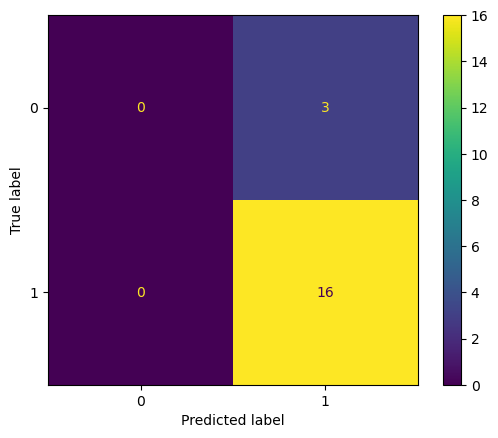

In [191]:
# Step 3: Plot the confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

- title: Confusion Matrix Interpretation
  content: |
    ✅ **Confusion matrix you posted:**

    |               | Predicted: 0 (Not Landed) | Predicted: 1 (Landed) |
    |---------------|---------------------------|------------------------|
    | True: 0 (Not Landed) | 0 | 3 |
    | True: 1 (Landed)     | 0 | 16 |

    ---

    Now, what each number means:

    - **Top-left (0):**  
      True label = 0 (Not Landed)  
      Predicted = 0 (Not Landed)  
      ➔ **True Negative (TN)** = 0

    - **Top-right (3):**  
      True label = 0 (Not Landed)  
      Predicted = 1 (Landed)  
      ➔ **False Positive (FP)** = 3

    - **Bottom-left (0):**  
      True label = 1 (Landed)  
      Predicted = 0 (Not Landed)  
      ➔ **False Negative (FN)** = 0

    - **Bottom-right (16):**  
      True label = 1 (Landed)  
      Predicted = 1 (Landed)  
      ➔ **True Positive (TP)** = 16

    ---

    🔵 **Summary**:

    | Metric              | Value |
    |---------------------|-------|
    | True Positive (TP)   | 16    |
    | True Negative (TN)   | 0     |
    | False Positive (FP)  | 3     |
    | False Negative (FN)  | 0     |

    ---

    🧠 **Meaning:**
    - The model **always predicts "landed"** (label = 1).
    - It **never predicts "not landed"** (label = 0).
    - As a result:
      - **No true negatives** (no correct prediction for "not landed")
      - **False positives exist** (predicting "landed" when actually "not landed")

    ---

    ⚡ **Problem:**  
    Your model **is biased towards predicting landings (1)**.  
    It **makes false positives**, predicting landing even when it should predict not landed.

    ---

    ### Very simple one-liner:
    > ➔ Logistic regression here **is overpredicting landings**, causing false positives, because there are no correct predictions for "not landed" class.



Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [192]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}


In [193]:
svm = SVC()

In [194]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

In [195]:
svm_cv.fit(X_train, Y_train)

e:\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [196]:
# Output best parameters and best score
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9232142857142858


Calculate the accuracy on the test data using the method <code>score</code>:

In [197]:
test_accuracy_svm = svm_cv.best_estimator_.score(X_test, Y_test)

print("Test Accuracy of the Best SVM Model:", test_accuracy_svm)

Test Accuracy of the Best SVM Model: 0.8421052631578947


We can plot the confusion matrix

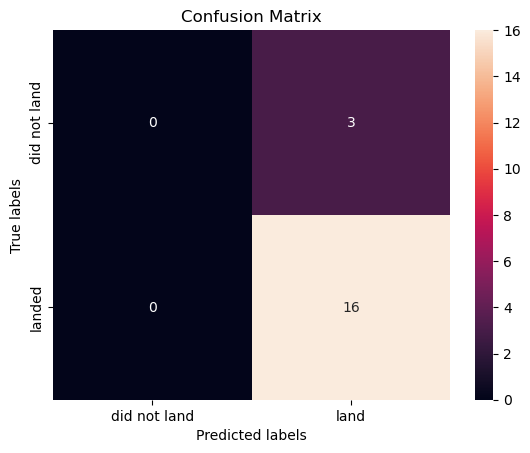

In [198]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [199]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  # <-- auto removed
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

In [200]:
# Create Decision Tree object
tree = DecisionTreeClassifier()

In [201]:

# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')

In [202]:
# Fit GridSearchCV on training data
tree_cv.fit(X_train, Y_train)

e:\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

e:\Anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [203]:
print("Tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("Accuracy :", tree_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy : 0.95


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [204]:
test_accuracy_tree = tree_cv.best_estimator_.score(X_test, Y_test)

print("Test Accuracy of the Best Decision Tree Model:", test_accuracy_tree)

Test Accuracy of the Best Decision Tree Model: 0.8947368421052632


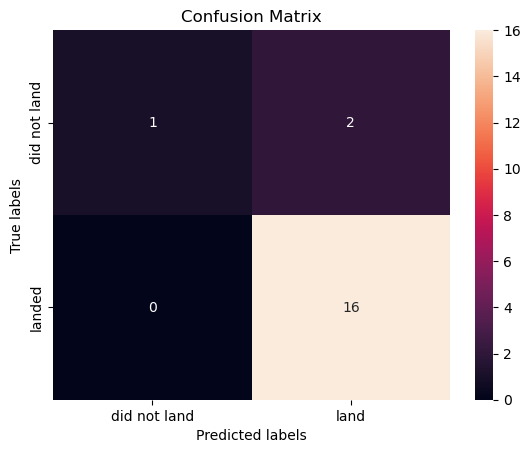

In [205]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [206]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  
}

In [207]:
# Create KNN object
KNN = KNeighborsClassifier()

In [208]:
# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring='accuracy')

In [209]:
# Fit GridSearchCV on training data
knn_cv.fit(X_train, Y_train)

e:\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [210]:
# Output best parameters and best score
print("Tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
Accuracy : 0.9232142857142858


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [211]:
test_accuracy_knn = knn_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy of the Best KNN Model:", test_accuracy_knn)

Test Accuracy of the Best KNN Model: 0.8421052631578947


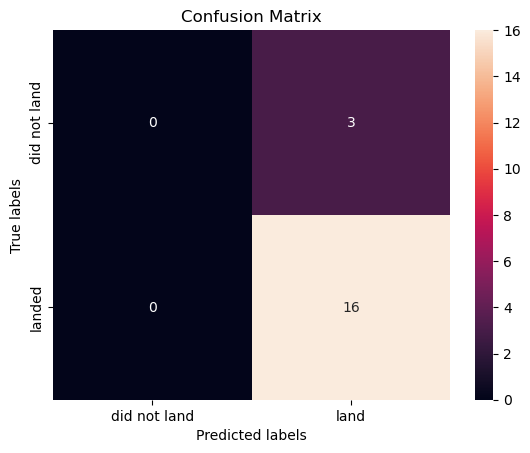

In [212]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Find the method performs best:

In [213]:
# Gather all validation (cv) scores
lr_val_score = grid_search.best_score_
svm_val_score = svm_cv.best_score_
tree_val_score = tree_cv.best_score_
knn_val_score = knn_cv.best_score_

In [214]:

# Gather all test scores
lr_test_score = grid_search.best_estimator_.score(X_test, Y_test)
svm_test_score = svm_cv.best_estimator_.score(X_test, Y_test)
tree_test_score = tree_cv.best_estimator_.score(X_test, Y_test)
knn_test_score = knn_cv.best_estimator_.score(X_test, Y_test)

In [215]:

import pandas as pd

summary = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "KNN"],
    "Validation Accuracy (CV)": [lr_val_score, svm_val_score, tree_val_score, knn_val_score],
    "Test Accuracy": [lr_test_score, svm_test_score, tree_test_score, knn_test_score]
}

summary_df = pd.DataFrame(summary)
display(summary_df)

,Model,Validation Accuracy (CV),Test Accuracy
0,Logistic Regression,0.920000,0.842105
1,SVM,0.923214,0.842105
2,Decision Tree,0.950000,0.894737
3,KNN,0.923214,0.842105


### Find the best model
We already have four models:

1. grid_search (Logistic Regression)
2. svm_cv (SVM)
3. tree_cv (Decision Tree)
4. knn_cv (KNN)

In [216]:
# Collect all test accuracies
test_scores = {
    "Logistic Regression": grid_search.best_estimator_.score(X_test, Y_test),
    "SVM": svm_cv.best_estimator_.score(X_test, Y_test),
    "Decision Tree": tree_cv.best_estimator_.score(X_test, Y_test),
    "KNN": knn_cv.best_estimator_.score(X_test, Y_test)
}

In [217]:
# Find the best model
best_model_name = max(test_scores, key=test_scores.get)
print(f"Best Model is: {best_model_name} with accuracy {test_scores[best_model_name]:.4f}")

Best Model is: Decision Tree with accuracy 0.8947


### Save The Best Model

In [218]:
import os
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

if best_model_name == "Logistic Regression":
    best_clf = grid_search.best_estimator_
elif best_model_name == "SVM":
    best_clf = svm_cv.best_estimator_
elif best_model_name == "Decision Tree":
    best_clf = tree_cv.best_estimator_
elif best_model_name == "KNN":
    best_clf = knn_cv.best_estimator_

best_model = make_pipeline(StandardScaler(), best_clf)

os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "models/falcon9_pipeline.joblib", compress=3)

print("✅ Model saved at: models/falcon9_pipeline.joblib")

✅ Model saved at: models/falcon9_pipeline.joblib


### Load The Model

In [219]:

model = joblib.load("models/falcon9_pipeline.joblib")
print("✅ Model loaded successfully")

✅ Model loaded successfully


In [220]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), best_clf)  # create
pipe.fit(X_train, Y_train)                         # fit on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                                        min_samples_split=5))])

In [221]:
import os, joblib

os.makedirs("models", exist_ok=True)
joblib.dump(pipe, "models/falcon9_pipeline.joblib", compress=3)

print("✅ Model saved after fitting: models/falcon9_pipeline.joblib")

✅ Model saved after fitting: models/falcon9_pipeline.joblib


In [222]:
model = joblib.load("models/falcon9_pipeline.joblib")

In [223]:

import numpy as np

sample = np.random.rand(1, 85)   # Dummy sample: random numbers between 0 and 1, shape (1, 85)

prediction = model.predict(sample)
print("Prediction:", prediction)

proba = model.predict_proba(sample)
print("Probabilities:", proba)

Prediction: [1]
Probabilities: [[0.11111111 0.88888889]]


## Let’s create a simple Flask API to deploy your best model

In [2]:
!pip install flask

In [3]:
!pip install flask-ngrok

In [4]:
!pip install flasgger

In [5]:
!pip install -r requirements.txt

In [6]:
!pip install fastapi uvicorn

In [7]:
!pip install "fastapi[all]"

In [8]:
!pip install scikit-learn==1.5.1

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ------ --------------------------------- 1.8/10.9 MB 12.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.9 MB 12.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.9 MB 10.8 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/10.9 MB 7.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/10.9 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.9 MB 6.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/10.9 MB 6.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/10.9 MB 5.6 MB/s eta 0:00:01
   -------------------------------------- - 10.5/10.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 10.9/10.9 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-

In [11]:
# generate 85 random value integers
import random
import numpy as np
import pandas as pd
import json

values = random.choices(range(1, 1001), k=85)
print(values)

[676, 253, 947, 252, 121, 73, 661, 732, 438, 245, 582, 889, 910, 647, 679, 865, 192, 953, 663, 696, 243, 956, 393, 723, 9, 581, 186, 123, 679, 256, 133, 986, 312, 771, 395, 367, 662, 924, 380, 19, 232, 958, 235, 125, 271, 909, 111, 763, 162, 174, 746, 798, 214, 338, 68, 191, 500, 704, 28, 124, 632, 173, 642, 900, 90, 730, 70, 707, 230, 540, 746, 557, 813, 809, 684, 147, 22, 78, 583, 142, 379, 241, 651, 351, 153]
